In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [4]:
# we use the `Path` function from pathlib to tell python what the path looks like. If you use this code you're
# going to need to change the name after `Users` to your username!
data_2011 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_census_files")
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")
corr_file = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2011_2016_correspondence")

In [6]:
#read in median values 
sa2_tenure_11 = pd.read_csv(data_2011/'SA2_NSW/2011Census_B32_NSW_SA2_short.csv')
# Read in the sa2 Shapefile for 2016
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')
#changet he data type of the sa2 to make it an integer. Since it doesn't have any leading zeros, it's fine to use
sa2_shape16['SA2_MAIN16']=sa2_shape16['SA2_MAIN16'].astype(int)


In [7]:
# Read in the sa2 Shapefile 
sa2_shape11 = gpd.read_file(shp_file_path/'SA2_2011_AUST.dbf')
sa2_shape11['SA2_MAIN'] = sa2_shape11['SA2_MAIN'].astype(int)

# # Merge shapefile with 
sa2_2011 = pd.merge(sa2_tenure_11,sa2_shape11,left_on='region_id',right_on='SA2_MAIN',how='left')
sa2_2011.isnull().sum()
sa2_2011.dropna(inplace=True)

In [11]:
# we have way too many columns in this dataframe. Let's remove all of the variables that do not contain totals 
# and try to isolate the total variables

tot_cols = [col for col in sa2_2011.columns if 'Tot' in col]
print(list(sa2_2011.columns))
print(tot_cols)

['region_id', 'O_OR_DS_Sep_house', 'O_OR_DS_SemiD_ro_or_tce_h_th', 'O_OR_DS_Flat_unit_apart', 'O_OR_DS_Oth_dwell', 'O_OR_DS_not_stated', 'O_OR_Total', 'O_MTG_DS_Sep_house', 'O_MTG_DS_SemiD_ro_or_tce_h_th', 'O_MTG_DS_Flat_unit_apart', 'O_MTG_DS_Oth_dwell', 'O_MTG_DS_not_stated', 'O_MTG_Total', 'R_RE_Agt_DS_Sep_house', 'R_RE_Ag_DS_SemD_ro_or_tc_h_th', 'R_RE_Agt_DS_Flat_unit_apart', 'R_RE_Agt_DS_Oth_dwell', 'R_RE_Agt_DS_not_stated', 'R_RE_Agt_Total', 'R_ST_h_auth_DS_Sep_house', 'R_ST_h_au_DS_SD_ro_or_tc_h_th', 'R_ST_h_auth_DS_Flat_unit_aprt', 'R_ST_h_auth_DS_Oth_dwell', 'R_ST_h_auth_DS_not_stated', 'R_ST_h_auth_Total', 'R_Psn_not_in_s_hh_DS_Sep_hous', 'R_P_not_in_s_h_DS_SD_ro_t_h_t', 'R_Ps_not_in_s_hh_DS_Flt_ut_at', 'R_Psn_not_in_s_hh_DS_Oth_dwel', 'R_Psn_not_in_s_hh_DS_NS', 'R_Psn_not_in_s_hh_Total', 'R_Hs_cop_cty_ch_gp_DS_Sp_ho', 'R_Hs_c_ct_ch_g_DS_SD_ro_t_h_t', 'R_Hse_cp_cty_ch_g_DS_Fl_u_at', 'R_Hs_cop_cty_ch_gp_DS_Ot_dwel', 'R_Hse_coop_cty_ch_gp_DS_NS', 'R_Hse_coop_cty_ch_gp_Total', '

In [13]:
# create the new dataframe with only the total variables as well as the SA2 information with geometry 
sa2_2011 = sa2_2011[['region_id','O_OR_Total', 'O_MTG_Total','R_Tot_Total','Total_Total',
                     'SA2_MAIN', 'SA2_NAME', 'STATE_CODE','STATE_NAME', 'AREA_SQKM', 'geometry']]

In [14]:
# Correspondence testing 
corr = pd.read_csv(corr_file/'2011_2016_corr.csv')
corr_test11 = pd.merge(sa2_2011,corr, left_on='region_id',right_on='SA2_MAINCODE_2011',how='right')

In [15]:
# after reading in the correspondence, drop any null values in the dataframe
corr_test11.dropna(inplace=True)
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   region_id          589 non-null    float64 
 1   O_OR_Total         589 non-null    float64 
 2   O_MTG_Total        589 non-null    float64 
 3   R_Tot_Total        589 non-null    float64 
 4   Total_Total        589 non-null    float64 
 5   SA2_MAIN           589 non-null    float64 
 6   SA2_NAME           589 non-null    object  
 7   STATE_CODE         589 non-null    object  
 8   STATE_NAME         589 non-null    object  
 9   AREA_SQKM          589 non-null    float64 
 10  geometry           589 non-null    geometry
 11  SA2_MAINCODE_2011  589 non-null    int64   
 12  SA2_NAME_2011      589 non-null    object  
 13  SA2_MAINCODE_2016  589 non-null    int64   
 14  SA2_NAME_2016      589 non-null    object  
 15  RATIO              589 non-null    float64 
 16  PERCENTA

In [16]:
# merge correspondence with the sa2 shapefile to be able to match entries
corr_test11 = pd.merge(corr_test11,sa2_shape16, left_on='SA2_MAINCODE_2016',right_on='SA2_MAIN16',how='left')
# drop null values from merge
corr_test11.dropna(inplace=True)

In [17]:
corr_test11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 301 to 588
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   region_id          270 non-null    float64 
 1   O_OR_Total         270 non-null    float64 
 2   O_MTG_Total        270 non-null    float64 
 3   R_Tot_Total        270 non-null    float64 
 4   Total_Total        270 non-null    float64 
 5   SA2_MAIN           270 non-null    float64 
 6   SA2_NAME           270 non-null    object  
 7   STATE_CODE         270 non-null    object  
 8   STATE_NAME         270 non-null    object  
 9   AREA_SQKM          270 non-null    float64 
 10  geometry_x         270 non-null    geometry
 11  SA2_MAINCODE_2011  270 non-null    int64   
 12  SA2_NAME_2011      270 non-null    object  
 13  SA2_MAINCODE_2016  270 non-null    int64   
 14  SA2_NAME_2016      270 non-null    object  
 15  RATIO              270 non-null    float64 
 16  PERCEN

In [18]:
# drop duplicate geometry values and rename one to use for later mapping
corr_test11.drop('geometry_x',axis=1, inplace=True)
corr_test11.rename(columns={'geometry_y':'geometry'},inplace=True)
corr_test11 = gpd.GeoDataFrame(corr_test11)

Create dummy variables for case study areas:

In [19]:
corr_test11['red_wat_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117031335)
                                      |(corr_test11.SA2_MAINCODE_2016==117031338),1,0)

corr_test11['marrick_dv'] = np.where((corr_test11.SA2_MAINCODE_2016==117021326),1,0)

## Creating descriptive statistics for different tenure types

This section we break out what the different tenure type distributions are in the Sydney UCL

In [21]:
# isolate the variables from the corrspondence merge to add into the bottom dataframes that compare regional median
reg_tenure11 = corr_test11[['SA2_MAINCODE_2016','O_OR_Total','O_MTG_Total' ,'R_Tot_Total','Total_Total',
                            'red_wat_dv','marrick_dv','geometry','region_id','RATIO']]
reg_tenure11.reset_index(inplace=True)
reg_tenure11.drop('index',axis=1,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
reg_tenure11.describe()

,SA2_MAINCODE_2016,O_OR_Total,O_MTG_Total,R_Tot_Total,Total_Total,red_wat_dv,marrick_dv,region_id,RATIO
count,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02,270.000000
mean,1.216048e+08,1858.292593,2183.314815,2011.677778,6250.377778,0.007407,0.003704,1.216047e+08,0.862828
std,3.990196e+06,872.081542,979.544269,1337.110074,2544.901898,0.085906,0.060858,3.990208e+06,0.274603
min,1.150113e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150113e+08,0.000377
25%,1.180216e+08,1235.250000,1575.750000,945.250000,4940.000000,0.000000,0.000000,1.180214e+08,0.999959
50%,1.210314e+08,1760.500000,2101.500000,1702.500000,6310.500000,0.000000,0.000000,1.210314e+08,1.000000
75%,1.250315e+08,2443.500000,2803.000000,2792.750000,7954.750000,0.000000,0.000000,1.250315e+08,1.000000
max,1.280216e+08,3944.000000,4695.000000,5750.000000,11943.000000,1.000000,1.000000,1.280215e+08,1.000000


In [56]:
reg_tenure11['renters_ratio'] = reg_tenure11.R_Tot_Total * reg_tenure11.RATIO
reg_tenure11['owner_or_ratio'] = reg_tenure11.O_OR_Total * reg_tenure11.RATIO
reg_tenure11['owner_mtg_ratio'] = reg_tenure11.O_MTG_Total * reg_tenure11.RATIO
reg_tenure11['total_ratio'] = reg_tenure11.Total_Total * reg_tenure11.RATIO
reg_tenure11['p_rent_ratio'] = reg_tenure11.renters_ratio/reg_tenure11.total_ratio
reg_tenure11['p_own_ratio'] = (reg_tenure11.owner_or_ratio+reg_tenure11.owner_mtg_ratio)/reg_tenure11.total_ratio
reg_tenure11['p_rent_ratio'].fillna(0,inplace=True)
reg_tenure11['p_own_ratio'].fillna(0,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [59]:
perc =[.20, .40, .60, .80]
reg_tenure11.describe(percentiles=perc)

,SA2_MAINCODE_2016,O_OR_Total,O_MTG_Total,R_Tot_Total,Total_Total,red_wat_dv,marrick_dv,region_id,RATIO,renters_ratio,owner_or_ratio,owner_mtg_ratio,total_ratio,p_rent_ratio,p_own_ratio
count,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,1.216048e+08,1858.292593,2183.314815,2011.677778,6250.377778,0.007407,0.003704,1.216047e+08,0.862828,1637.793997,1514.845193,1754.082242,5065.526616,0.312925,0.637850
std,3.990196e+06,872.081542,979.544269,1337.110074,2544.901898,0.085906,0.060858,3.990208e+06,0.274603,1186.208793,814.238841,862.609649,2340.684671,0.164802,0.181350
min,1.150113e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150113e+08,0.000377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,1.180113e+08,1137.600000,1392.600000,854.800000,4202.000000,0.000000,0.000000,1.180113e+08,0.717046,657.037949,860.349733,1064.800000,3064.679020,0.177655,0.524927
40%,1.200214e+08,1615.600000,1882.000000,1483.000000,5603.000000,0.000000,0.000000,1.200214e+08,1.000000,1159.759794,1228.400000,1566.101345,4719.556340,0.255719,0.619944
50%,1.210314e+08,1760.500000,2101.500000,1702.500000,6310.500000,0.000000,0.000000,1.210314e+08,1.000000,1464.535949,1434.228644,1738.000000,5316.000000,0.294520,0.660516
60%,1.230214e+08,2009.000000,2395.400000,2072.400000,6954.400000,0.000000,0.000000,1.230214e+08,1.000000,1702.000000,1656.800000,1957.194294,5752.200000,0.334765,0.707137
80%,1.260135e+08,2654.800000,2955.200000,3220.600000,8469.000000,0.000000,0.000000,1.260135e+08,1.000000,2476.000000,2262.400000,2501.400000,7097.800000,0.420898,0.792754
max,1.280216e+08,3944.000000,4695.000000,5750.000000,11943.000000,1.000000,1.000000,1.280215e+08,1.000000,5750.000000,3944.000000,4695.000000,10741.000000,1.000000,0.922531


In [66]:
reg_tenure11.quantile([.25,.5,.75], axis=0)

,SA2_MAINCODE_2016,O_OR_Total,O_MTG_Total,R_Tot_Total,Total_Total,red_wat_dv,marrick_dv,region_id,RATIO,renters_ratio,owner_or_ratio,owner_mtg_ratio,total_ratio,p_rent_ratio,p_own_ratio
0.25,1.180216e+08,1235.25,1575.75,945.25,4940.00,0.0,0.0,1.180214e+08,0.999959,771.250000,973.247043,1178.275579,3595.645758,0.193401,0.553076
0.50,1.210314e+08,1760.50,2101.50,1702.50,6310.50,0.0,0.0,1.210314e+08,1.000000,1464.535949,1434.228644,1738.000000,5316.000000,0.294520,0.660516
0.75,1.250315e+08,2443.50,2803.00,2792.75,7954.75,0.0,0.0,1.250315e+08,1.000000,2251.157105,2035.750000,2350.250000,6691.250000,0.404127,0.774507


#### Dummy variables for different tenure types (apply once we figure out what we want to set for the quantile

In [67]:
# create a dummy variable for if the area has at least 500 households
reg_tenure11['thresh500_dv'] = np.where((reg_tenure11.renters_ratio>=500),1,0)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Looking at the mean households by tenure type in each case study area

In [68]:
# Calculate Visitors from different SA2s in Redfern/Waterloo
reg_tenure11['p_rent_ratio'].groupby(reg_tenure11['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,268,0.310796
1,2,0.598232


In [69]:
# Calculate total visitors in Redfern/Waterloo
reg_tenure11['p_own_ratio'].groupby(reg_tenure11['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,268,0.639873
1,2,0.366865


In [70]:
# Calculate Visitors from different SA2s in Marrickville
reg_tenure11['p_rent_ratio'].groupby(reg_tenure11['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,269,0.312530
1,1,0.419341


In [71]:
# Calculate total visitors in Marrickville
reg_tenure11['p_own_ratio'].groupby(reg_tenure11['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,269,0.638193
1,1,0.545741


## Creating shapes for Case Study Areas:
This section dissolves boundaries for the case study areas Redfern/Waterloo, Marrickville, and Banksie/Camptown.

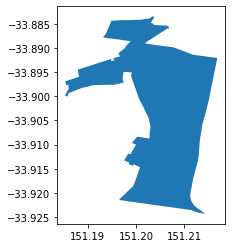

In [49]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo
red_wat_gdf = corr_test11[(corr_test11.SA2_MAIN16==117031335)
                          |(corr_test11.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

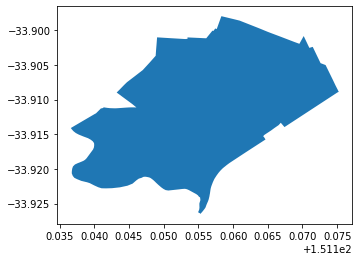

In [50]:
# let's isolate the sa2s that make up our case study areas of  Marrickville
marr_gdf = corr_test11[(corr_test11.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

# Mapping out with the ratios included in the calculations
### Including the maps where the ratios were calculated into the totals as well to see what the breakdown by SA2 would be with that included

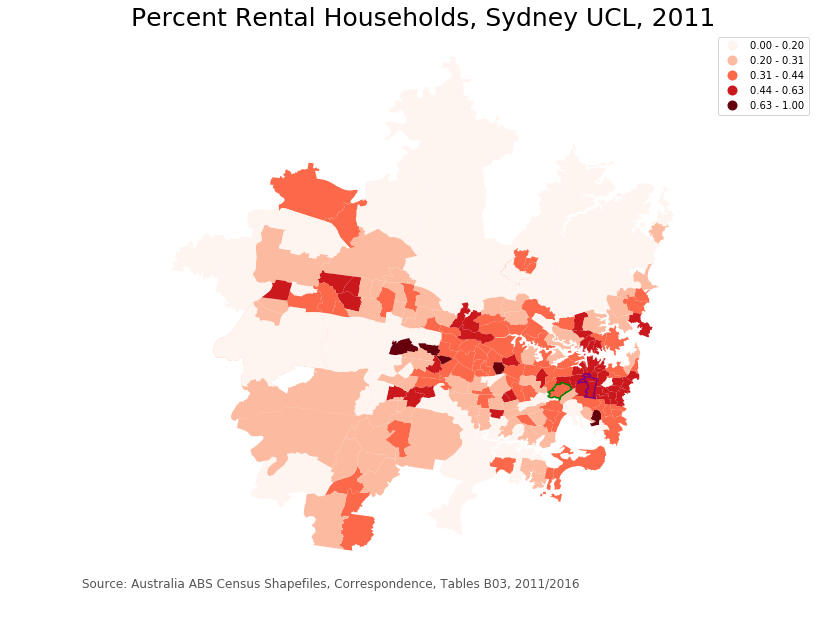

In [65]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_tenure11.plot(column="p_rent_ratio", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Percent Rental Households, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

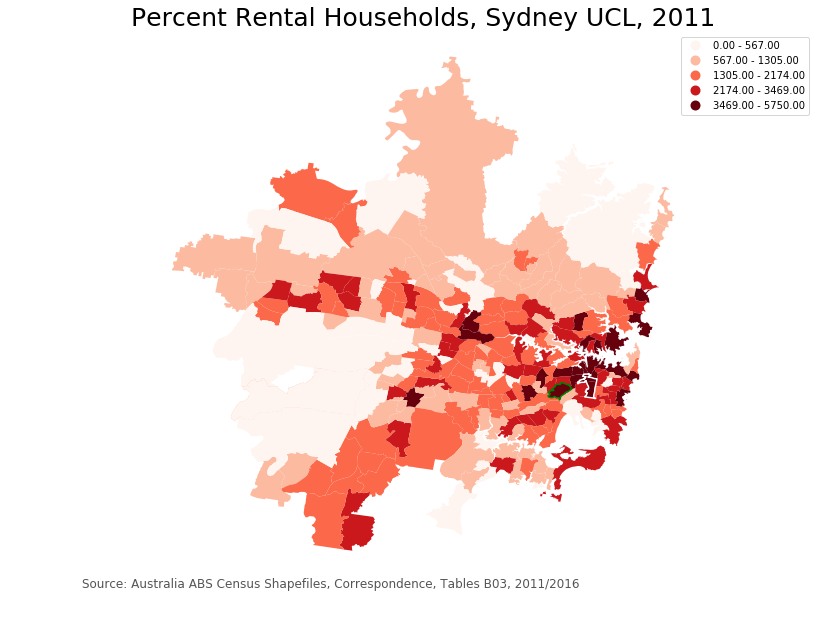

In [64]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_tenure11.plot(column="renters_ratio", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "White", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Percent Rental Households, Sydney UCL, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables B03, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Create an output CSV to apply to master document for typology sets

In [73]:
reg_tenure11.drop('geometry',axis=1,inplace=True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
reg_tenure11.to_csv('2011_UCL_Visitors.csv')